# EDA

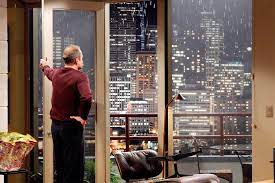

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
data = pd.read_csv('data/King_County_House_prices_dataset.csv')

In [4]:
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


In [5]:
# Check for NAs
data.isna().sum()
# NAs in columns waterfront (2376), view (63), yr_renovated (3842)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
data['id'].duplicated().value_counts()
# 177 houses appear more than once on the list

id
False    21420
True       177
Name: count, dtype: int64

In [95]:
tempna = data[data['id'].duplicated() == True]
naids = tempna['id']
data_dup = data[data['id'].isin(naids)]
data_dup['id'].value_counts()

id
795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: count, Length: 176, dtype: int64

In [98]:
def assign_number(group):
    group = group.sort_values(by='date')  # Sort by 'datetime' within each group
    group['time'] = range(1, len(group) + 1)
    return group.reset_index()  
    
# Apply the function to the DataFrame grouped by 'Id'
data_dup = data_dup.groupby('id').apply(assign_number).reset_index(drop=True)


In [8]:
data_dup.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront       46
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated     67
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [9]:
# Find rows with missing values in 'waterfront' column
missing_waterfront_rows = data_dup[data_dup['waterfront'].isnull()]

# Get unique 'id' values from those rows
ids_with_missing_waterfront = missing_waterfront_rows['id'].unique()

# Filter the dataframe to include all rows with the same 'id' values
related_rows = data_dup[data_dup['id'].isin(ids_with_missing_waterfront)]

# Display the result
related_rows.sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.000,6,3.000,2400,9373,2.000,0.000,0.000,...,7,2400,0.0,1991,0.000,98002,47.326,-122.214,2060,7316
2494,1000102,2014-09-16,280000.000,6,3.000,2400,9373,2.000,NaN,0.000,...,7,2400,0.0,1991,0.000,98002,47.326,-122.214,2060,7316
823,726049190,2014-10-02,287500.000,3,1.000,1810,7200,1.000,0.000,0.000,...,7,1130,680.0,1954,0.000,98133,47.749,-122.351,1810,8100
824,726049190,2015-02-18,431000.000,3,1.000,1810,7200,1.000,NaN,0.000,...,7,1130,680.0,1954,0.000,98133,47.749,-122.351,1810,8100
17589,795000620,2014-12-15,124000.000,3,1.000,1080,6250,1.000,0.000,0.000,...,5,1080,0.0,1950,0.000,98168,47.505,-122.330,1070,6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11575,8807810890,2014-11-05,385000.000,3,1.000,1250,21303,1.000,0.000,0.000,...,6,1250,0.0,1970,NaN,98053,47.663,-122.059,1250,17920
2975,9136103130,2015-05-12,685000.000,2,1.500,1090,4013,1.500,0.000,0.000,...,7,1090,0.0,1900,NaN,98103,47.665,-122.338,1390,4013
2974,9136103130,2014-12-01,430000.000,2,1.500,1090,4013,1.500,NaN,0.000,...,7,1090,0.0,1900,0.000,98103,47.665,-122.338,1390,4013
6366,9222400605,2015-04-11,850000.000,5,4.000,2980,4500,1.500,0.000,0.000,...,7,2070,910.0,1921,0.000,98115,47.674,-122.323,1560,4225


In [10]:
#Group the dataframe by 'id'
groups = data.groupby('id')

# Filter groups to include only those with more than one row
multiple_rows_groups = groups.filter(lambda x: len(x) > 1)

# Initialize a list to store rows with differing 'grade' values
differing_grade_rows = []

# Iterate over each group
for name, group in multiple_rows_groups.groupby('id'):
    # Check if there are multiple unique values for 'grade' within the group
    if len(group['grade'].unique()) > 1:
        differing_grade_rows.extend(group.values.tolist())

# Convert the list of rows to a dataframe
result_df = pd.DataFrame(differing_grade_rows, columns=data.columns)

# Display the result
print(result_df)

# There are no changes to the grade -> No conclusions can be drawn for renovations -> copy renovations for NAs

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]


In [11]:
## Impute missing values from same ID
# Group by 'id'
groups = data.groupby('id')

# Iterate over each group
for name, group in groups:
    # Check if 'waterfront' column has missing values in the group
    if group['waterfront'].isnull().any():
        # Get non-missing values for 'waterfront' in the group
        non_missing_values = group.loc[group['waterfront'].notnull(), 'waterfront']
        
        # If there are non-missing values, impute the first one into missing values
        if not non_missing_values.empty:
            first_non_missing_value = non_missing_values.iloc[0]
            data.loc[group.index, 'waterfront'] = first_non_missing_value

# Iterate over each group
for name, group in groups:
    # Check if 'waterfront' column has missing values in the group
    if group['yr_renovated'].isnull().any():
        # Get non-missing values for 'waterfront' in the group
        non_missing_values = group.loc[group['yr_renovated'].notnull(), 'yr_renovated']
        
        # If there are non-missing values, impute the first one into missing values
        if not non_missing_values.empty:
            first_non_missing_value = non_missing_values.iloc[0]
            data.loc[group.index, 'yr_renovated'] = first_non_missing_value

            
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2336
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3785
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [13]:
#data['waterfront'].value_counts()
#data['waterfront'] = data['waterfront'].replace({0: 'no', 1: 'yes'}).astype('object')
data['waterfront'].value_counts(dropna=False)


waterfront
0.000    19115
NaN       2336
1.000      146
Name: count, dtype: int64

In [14]:
#data['yr_renovated'] = data['yr_renovated'].replace(np.NaN, 0).astype('int')
data['yr_renovated'].value_counts(dropna=False)

yr_renovated
0.000       17068
NaN          3785
2014.000       73
2013.000       31
2003.000       31
            ...  
1948.000        1
1946.000        1
1976.000        1
1951.000        1
1971.000        1
Name: count, Length: 71, dtype: int64

In [15]:
#data['view'] = data['view'].replace(np.NaN, 0).astype('int')
data['view'].value_counts(dropna=False)

view
0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
NaN         63
Name: count, dtype: int64

In [19]:
data['sqft_basement'].value_counts(dropna=False)

sqft_basement
0.000       12826
NaN           454
600.000       217
500.000       209
700.000       208
            ...  
1920.000        1
3480.000        1
2730.000        1
2720.000        1
248.000         1
Name: count, Length: 304, dtype: int64

In [18]:
data['sqft_basement'] = data['sqft_basement'].replace({'?': np.NaN}).astype('float')


In [20]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19261.000,21534.000,...,21597.000,21597.000,21143.000,21597.000,17812.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,2014-10-29 04:20:38.171968512,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,...,7.658,1788.597,291.852,1971.000,83.369,98077.952,47.560,-122.214,1986.620,12758.284
min,1000102.000,2014-05-02 00:00:00,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,...,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,2014-07-22 00:00:00,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,...,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,2014-10-16 00:00:00,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,...,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,2015-02-17 00:00:00,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,...,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,2015-05-27 00:00:00,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,...,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000
std,2876735715.748,NaN,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,...,1.173,827.760,442.498,29.375,399.334,53.513,0.139,0.141,685.230,27274.442


In [33]:
data.sort_values(by = 'bedrooms', ascending=False).head(10)
# given other entries such as price and sqft_living, 33 seems to be a data error
data.drop(index=15856, inplace=True)
data.sort_values(by = 'bedrooms', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,2014-08-21,520000.000,11,3.000,3000,4960,2.000,0.000,0.000,...,7,2400,600.000,1918,1999.000,98106,47.556,-122.363,1420,4960
19239,8812401450,2014-12-29,660000.000,10,3.000,2920,3745,2.000,0.000,0.000,...,7,1860,1060.000,1913,0.000,98105,47.663,-122.320,1810,3745
15147,5566100170,2014-10-29,650000.000,10,2.000,3610,11914,2.000,0.000,0.000,...,7,3010,600.000,1958,0.000,98006,47.571,-122.175,2040,11914
13301,627300145,2014-08-14,1150000.000,10,5.250,4590,10920,1.000,0.000,2.000,...,9,2500,2090.000,2008,0.000,98004,47.586,-122.113,2730,10400
4092,1997200215,2014-05-07,599999.000,9,4.500,3830,6988,2.500,0.000,0.000,...,7,2450,1380.000,1938,0.000,98103,47.693,-122.338,1460,6291
18428,8823901445,2015-03-13,934000.000,9,3.000,2820,4480,2.000,0.000,0.000,...,7,1880,940.000,1918,0.000,98105,47.665,-122.307,2460,4400
16830,8823900290,2015-03-17,1400000.000,9,4.000,4620,5508,2.500,0.000,0.000,...,11,3870,750.000,1915,0.000,98105,47.668,-122.309,2710,4320
8537,424049043,2014-08-11,450000.000,9,7.500,4050,6504,2.000,0.000,0.000,...,7,4050,0.000,1996,0.000,98144,47.592,-122.301,1448,3866
4231,2902200015,2015-01-06,700000.000,9,3.000,3680,4400,2.000,0.000,0.000,...,7,2830,850.000,1908,0.000,98102,47.637,-122.324,1960,2450
6073,9822700190,2014-08-08,1280000.000,9,4.500,3650,5000,2.000,0.000,0.000,...,8,2530,1120.000,1915,2010.000,98105,47.660,-122.289,2510,5000


In [34]:
data.sort_values(by = 'bathrooms', ascending=False).head(10)
# looks alright

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,13,8570,3480.000,1910,1987.000,98102,47.630,-122.323,3940,8800
12764,1225069038,2014-05-05,2280000.000,7,8.000,13540,307752,3.000,0.000,4.000,...,12,9410,4130.000,1999,0.000,98053,47.667,-121.986,4850,217800
9245,9208900037,2014-09-19,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,13,8860,1030.000,2001,0.000,98039,47.630,-122.240,4540,42730
8537,424049043,2014-08-11,450000.000,9,7.500,4050,6504,2.000,0.000,0.000,...,7,4050,0.000,1996,0.000,98144,47.592,-122.301,1448,3866
4020,9175600025,2014-10-07,800000.000,7,6.750,7480,41664,2.000,0.000,2.000,...,11,5080,2400.000,1953,NaN,98166,47.464,-122.368,2810,33190
8085,1924059029,2014-06-17,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,12,4820,4820.000,1983,2009.000,98040,47.557,-122.210,3270,10454
21490,2524069097,2014-05-09,2240000.000,5,6.500,7270,130017,2.000,0.000,0.000,...,12,6420,850.000,2010,NaN,98027,47.537,-121.982,1800,44890
20562,424069279,2015-03-28,1180000.000,6,6.500,6260,10955,2.000,NaN,0.000,...,11,4840,1420.000,2007,0.000,98075,47.595,-122.039,2710,12550
14542,2303900035,2014-06-11,2890000.000,5,6.250,8670,64033,2.000,0.000,4.000,...,13,6120,2550.000,1965,NaN,98177,47.730,-122.372,4140,81021
18288,6072800246,2014-07-02,3300000.000,5,6.250,8020,21738,2.000,0.000,0.000,...,11,8020,0.000,2001,NaN,98006,47.568,-122.189,4160,18969


In [35]:
data.sort_values(by = 'sqft_living', ascending=False).head(10)
# looks alright

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12764,1225069038,2014-05-05,2280000.000,7,8.000,13540,307752,3.000,0.000,4.000,...,12,9410,4130.000,1999,0.000,98053,47.667,-121.986,4850,217800
7245,6762700020,2014-10-13,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,13,8570,3480.000,1910,1987.000,98102,47.630,-122.323,3940,8800
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,11,7680,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449
9245,9208900037,2014-09-19,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,13,8860,1030.000,2001,0.000,98039,47.630,-122.240,4540,42730
8085,1924059029,2014-06-17,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,12,4820,4820.000,1983,2009.000,98040,47.557,-122.210,3270,10454
4407,2470100110,2014-08-04,5570000.000,5,5.750,9200,35069,2.000,0.000,0.000,...,13,6200,3000.000,2001,NaN,98039,47.629,-122.233,3560,24345
14542,2303900035,2014-06-11,2890000.000,5,6.250,8670,64033,2.000,0.000,4.000,...,13,6120,2550.000,1965,NaN,98177,47.730,-122.372,4140,81021
18288,6072800246,2014-07-02,3300000.000,5,6.250,8020,21738,2.000,0.000,0.000,...,11,8020,0.000,2001,NaN,98006,47.568,-122.189,4160,18969
1162,1247600105,2014-10-20,5110000.000,5,5.250,8010,45517,2.000,1.000,4.000,...,12,5990,2020.000,1999,0.000,98033,47.677,-122.211,3430,26788
1446,8907500070,2015-04-13,5350000.000,5,5.000,8000,23985,2.000,0.000,4.000,...,12,6720,1280.000,2009,0.000,98004,47.623,-122.220,4600,21750


In [36]:
data.sort_values(by = 'sqft_lot', ascending=False).head(10)
# looks alright

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,2015-03-27,700000.000,4,1.000,1300,1651359,1.000,0.000,3.000,...,6,1300,0.000,1920,0.000,98022,47.231,-122.023,2560,425581
17305,3326079016,2015-05-04,190000.000,2,1.000,710,1164794,1.000,0.000,0.000,...,5,710,0.000,1915,0.000,98014,47.689,-121.909,1680,16730
7640,2623069031,2014-05-21,542500.000,5,3.250,3010,1074218,1.500,NaN,0.000,...,8,2010,1000.000,1931,0.000,98027,47.456,-122.004,2450,68825
7762,2323089009,2015-01-19,855000.000,4,3.500,4030,1024068,2.000,0.000,0.000,...,10,4030,0.000,2006,0.000,98045,47.462,-121.744,1830,11700
3945,722069232,2014-09-05,998000.000,4,3.250,3770,982998,2.000,0.000,0.000,...,10,3770,0.000,1992,0.000,98058,47.414,-122.087,2290,37141
4437,3626079040,2014-07-30,790000.000,2,3.000,2560,982278,1.000,0.000,0.000,...,8,2560,0.000,2004,0.000,98014,47.696,-121.861,1620,40946
6685,2624089007,2015-03-20,2000000.000,2,2.500,3900,920423,2.000,0.000,0.000,...,12,3900,0.000,2009,0.000,98065,47.537,-121.756,2720,411962
7070,2724079090,2015-01-05,1650000.000,4,3.250,3920,881654,3.000,NaN,3.000,...,11,3920,NaN,2002,NaN,98024,47.538,-121.896,2970,112384
9705,225079036,2015-01-07,937500.000,4,4.000,5545,871200,2.000,0.000,0.000,...,11,3605,1940.000,2003,0.000,98014,47.676,-121.882,3420,871200
20436,1125079111,2015-04-15,1600000.000,4,5.500,6530,871200,2.000,0.000,2.000,...,11,6530,0.000,2008,0.000,98014,47.664,-121.878,1280,858132


In [38]:
data[data['sqft_living'] < data['sqft_above']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [39]:
data[data['sqft_living'] < data['sqft_basement']]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
import plotly.express as px

In [9]:
fig = px.scatter_mapbox(data, 
                        lat="lat", 
                        lon="long", 
                        color="zipcode",
                        zoom=8, 
                        height=800,
                        width=1700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [52]:
data['zipcode'].value_counts(dropna=False)

zipcode
98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [10]:
# List of Seattle Zip Codes
central_zip_codes = [
    98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98111, 
    98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 
    98124, 98125, 98126, 98127, 98129, 98131, 98133, 98134, 98136, 98138, 
    98139, 98141, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 
    98161, 98164, 98165, 98166, 98168, 98170, 98174, 98175, 98177, 98178, 
    98181, 98185, 98188, 98190, 98191, 98194, 98195, 98198, 98199
]

outskirts_zip_codes = [
    98022, 98010, 98045, 98065, 98024, 98014, 98019]

#overlapping_zip_codes = data[data['zipcode'].isin(central_zip_codes)]['zipcode'].tolist()
#len(list(set(overlapping_zip_codes)))

data['central'] = data['zipcode'].isin(central_zip_codes)
data['outskirts'] = data['zipcode'].isin(outskirts_zip_codes)
data['loc'] = 'suburbs'

data.loc[data['central'], 'loc'] = 'center'
data.loc[data['outskirts'], 'loc'] = 'outskirts'
data.drop(['central', 'outskirts'], axis=1, inplace=True)
data['loc'].value_counts()

loc
suburbs      11369
center        8973
outskirts     1255
Name: count, dtype: int64

In [108]:
#data['zipcode'].isin(central_zip_codes)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650,center
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639,center
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,770,0.000,1933,NaN,98028,47.738,-122.233,2720,8062,suburbs
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000,center
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503,suburbs


In [11]:
fig = px.scatter_mapbox(data, 
                        lat="lat", 
                        lon="long", 
                        color="loc",
                        color_discrete_sequence = ['cornflowerblue', 'coral', 'darkorchid'],
                        zoom=8, 
                        height=800,
                        width=1700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [94]:
data_c = data[data['loc'] == 'center']
data_s = data[data['loc'] == 'suburbs']
data_o = data[data['loc'] == 'outskirts']

In [206]:
# Upper 10% of Houses by price
threshold = data_c['price'].quantile(0.9)
upper_10 = data_c[data_c['price'] >= threshold]
upper_10

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc,month,season
26,1794500383,2014-06-26,937000.000,3,1.750,2450,2691,2.000,0.000,0.000,...,1915,NaN,98119,47.639,-122.360,1760,3573,center,6,summer
54,4217401195,2015-03-03,920000.000,5,2.250,2730,6000,1.500,0.000,0.000,...,1927,0.000,98105,47.657,-122.281,2730,6000,center,3,spring
55,9822700295,2014-05-12,885000.000,4,2.500,2830,5000,2.000,NaN,0.000,...,1995,0.000,98105,47.660,-122.290,1950,5000,center,5,spring
85,4232902595,2014-11-14,940000.000,3,1.500,2140,3600,2.000,0.000,0.000,...,1925,0.000,98119,47.634,-122.365,2020,4800,center,11,autumn
91,5036300431,2015-03-11,1100000.000,5,2.750,3520,6353,2.000,0.000,0.000,...,2001,0.000,98199,47.651,-122.391,2520,6250,center,3,spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21410,1070000180,2014-10-15,1110000.000,4,3.500,3660,4760,2.000,NaN,0.000,...,2014,0.000,98199,47.648,-122.409,3210,4640,center,10,autumn
21416,7104100110,2015-05-11,899000.000,4,3.500,2490,5500,2.000,0.000,0.000,...,2015,0.000,98136,47.550,-122.393,1710,5500,center,5,spring
21461,7010700308,2014-11-12,1010000.000,4,3.250,3610,4000,2.000,0.000,0.000,...,2007,NaN,98199,47.658,-122.396,1980,4000,center,11,autumn
21489,9468200109,2014-06-17,1560000.000,3,3.500,4360,6240,2.000,0.000,3.000,...,2008,0.000,98103,47.679,-122.354,1920,3910,center,6,summer


In [15]:
!pip install pandas statsmodels

  Using cached statsmodels-0.14.2-cp311-cp311-win_amd64.whl (9.9 MB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
#import statsmodels.api as sm
#upper_10['date_num'] = (upper_10['date'] - upper_10['date'].min()).dt.days
#def perform_regression(group):
    X = sm.add_constant(group['date_num'])  # Adds a constant term to the predictor
    y = group['price']
    model = sm.OLS(y, X).fit()  # Ordinary Least Squares regression
    return model.summary()

#results = upper_10.groupby('zipcode').apply(perform_regression)
#for zipcode, result in results.items():
    print(f"Zipcode: {zipcode}\n")
    print(result)
    print("\n" + "="*80 + "\n")

IndentationError: unexpected indent (3161112438.py, line 4)

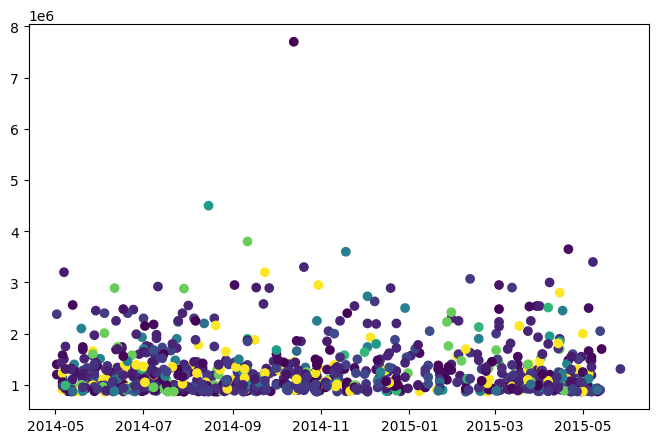

In [21]:
plt.scatter(upper_10['date'], upper_10['price'], c=upper_10['zipcode'])

In [78]:
upper_10['zipcode'].value_counts()


zipcode
98112    146
98199     94
98105     79
98115     67
98119     59
98103     50
98144     47
98177     47
98117     46
98109     40
98116     39
98122     37
98102     36
98136     23
98166     17
98125     14
98118     14
98107     12
98146     11
98155     10
98126      8
98178      3
98198      3
Name: count, dtype: int64

In [70]:
upper1030 = upper_10[upper_10['zipcode'].isin(p_30)]
upper1030

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc,date_num


In [83]:

# Function to perform correlation analysis
def perform_correlation(group):
    return group['price'].corr(group['date_num'])

# Group by zipcode and apply correlation function
correlations = upper_10.groupby('zipcode').apply(perform_correlation).sort_values()

# Print results
print(correlations)

zipcode
98136   -0.297
98155   -0.216
98109   -0.214
98119   -0.190
98125   -0.103
98102   -0.102
98115   -0.062
98107   -0.058
98117   -0.057
98177   -0.029
98122   -0.020
98126   -0.002
98112    0.038
98144    0.045
98105    0.096
98103    0.101
98199    0.126
98116    0.144
98118    0.154
98146    0.361
98166    0.408
98198    0.744
98178    0.959
dtype: float64


In [158]:
dup_c = data_dup[data_dup['id'].isin(data_c['id'])]

In [160]:
print(dup_c[dup_c['time'] == 1]['price'].mean())
print(dup_c[dup_c['time'] == 2]['price'].mean())

292257.0229885057
467421.724137931


In [ ]:
selected_rows = data[(data['date'].dt.month >= 1) & (df['datetime'].dt.month <= 3)]
data['central'] = data['zipcode'].isin(central_zip_codes)
data['outskirts'] = data['zipcode'].isin(outskirts_zip_codes)
data['loc'] = 'suburbs'

data.loc[data['central'], 'loc'] = 'center'
data.loc[data['outskirts'], 'loc'] = 'outskirts'
data.drop(['central', 'outskirts'], axis=1, inplace=True)

In [22]:
data_o

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc
16,1875500060,2014-07-31,395000.000,3,2.000,1890,14040,2.000,0.000,0.000,...,1890,0.0,1994,0.000,98019,47.728,-121.962,1890,14018,outskirts
45,8035350320,2014-07-18,488000.000,3,2.500,3160,13603,2.000,0.000,0.000,...,3160,0.0,2003,NaN,98019,47.744,-121.977,3050,9232,outskirts
79,1531000030,2015-03-23,720000.000,4,2.500,3450,39683,2.000,0.000,0.000,...,3450,?,2002,0.000,98010,47.342,-122.025,3350,39750,outskirts
99,7338200240,2014-05-16,437500.000,3,2.500,2320,36847,2.000,0.000,2.000,...,2320,0.0,1992,0.000,98045,47.484,-121.714,2550,35065,outskirts
129,7853210060,2015-04-06,430000.000,4,2.500,2070,4310,2.000,0.000,NaN,...,2070,0.0,2004,0.000,98065,47.532,-121.850,1970,3748,outskirts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21532,8835770330,2014-08-19,1060000.000,2,1.500,2370,184231,2.000,0.000,0.000,...,2370,0.0,2005,0.000,98045,47.454,-121.778,3860,151081,outskirts
21564,7853420110,2014-10-03,594866.000,3,3.000,2780,6000,2.000,0.000,0.000,...,2780,0.0,2013,0.000,98065,47.518,-121.886,2850,6000,outskirts
21565,7853420110,2015-05-04,625000.000,3,3.000,2780,6000,2.000,0.000,0.000,...,2780,0.0,2013,NaN,98065,47.518,-121.886,2850,6000,outskirts
21586,844000965,2014-06-26,224000.000,3,1.750,1500,11968,1.000,NaN,0.000,...,1500,0.0,2014,0.000,98010,47.309,-122.002,1320,11303,outskirts


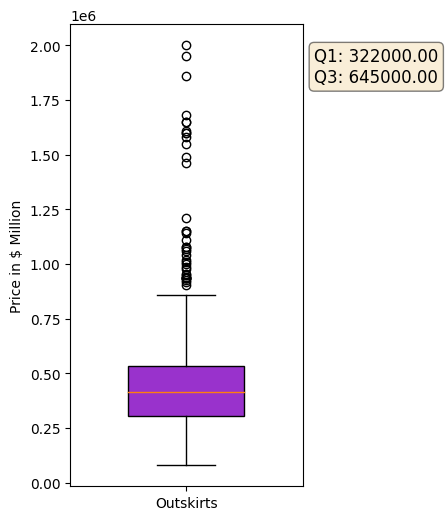

In [45]:
fig, ax = plt.subplots(figsize=(3, 6))  # Adjust the width and height here
boxplot = ax.boxplot(data_o[['price']].values, patch_artist=True, widths=0.5)

# Define colors for each box
colors = ['darkorchid']

# Apply colors to each box
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate Q1 and Q3
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# Add a textbox with Q1 and Q3 information
textstr = f'Q1: {Q1:.2f}\nQ3: {Q3:.2f}'

# Add a textbox in the upper right corner
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)


# Add a label to the y-axis
ax.set_ylabel('Price in $ Million')

# Set the x-tick labels
ax.set_xticklabels(['Outskirts'])

# Show the plot
plt.show()

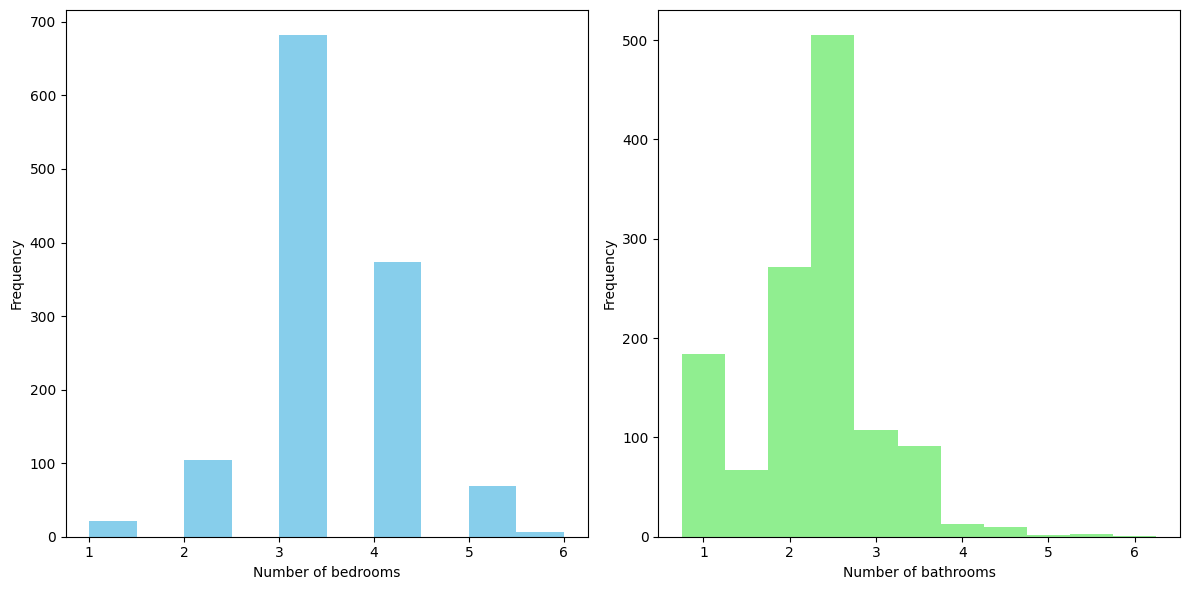

In [53]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot histogram for 'bedrooms'
ax1.hist(data_o['bedrooms'], bins=np.arange(min(data_o['bedrooms']), max(data_o['bedrooms']) + 0.5, 0.5), color='skyblue')
ax1.set_xlabel('Number of bedrooms')
ax1.set_ylabel('Frequency')

# Plot histogram for 'bathrooms'
ax2.hist(data_o['bathrooms'], bins=np.arange(min(data_o['bathrooms']), max(data_o['bathrooms']) + 0.5, 0.5), color='lightgreen')
ax2.set_xlabel('Number of bathrooms')
ax2.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot histogram for 'bedrooms'
ax1.hist(data_o['bedrooms'], bins=np.arange(min(data_o['bedrooms']), max(data_o['bedrooms']) + 0.5, 0.5), color='skyblue')
ax1.set_xlabel('Number of bedrooms')
ax1.set_ylabel('Frequency')

# Plot histogram for 'bathrooms'
ax2.hist(data_o['bathrooms'], bins=np.arange(min(data_o['bathrooms']), max(data_o['bathrooms']) + 0.5, 0.5), color='lightgreen')
ax2.set_xlabel('Number of bathrooms')
ax2.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650,center
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639,center
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062,suburbs
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000,center
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503,suburbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509,center
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200,center
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007,center
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287,suburbs


In [93]:
#selected_rows = data[(data['date'].dt.month >= 1) & (df['datetime'].dt.month <= 3)]
data['month'] = data['date'].dt.month
data['season'] = data['month']
data['season'] = data['season'].replace({12: 'winter', 1: 'winter', 2: 'winter'})
data['season'] = data['season'].replace({3: 'spring', 4: 'spring', 5: 'spring'})
data['season'] = data['season'].replace({6: 'summer', 7: 'summer', 8: 'summer'})
data['season'] = data['season'].replace({9: 'autumn', 10: 'autumn', 11: 'autumn'})
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc,month,season
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1955,0.000,98178,47.511,-122.257,1340,5650,center,10,autumn
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,1951,1991.000,98125,47.721,-122.319,1690,7639,center,12,winter
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,1933,NaN,98028,47.738,-122.233,2720,8062,suburbs,2,winter
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1965,0.000,98136,47.521,-122.393,1360,5000,center,12,winter
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1987,0.000,98074,47.617,-122.045,1800,7503,suburbs,2,winter
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,2001,0.000,98053,47.656,-122.005,4760,101930,suburbs,5,spring
6,1321400060,2014-06-27,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,1995,0.000,98003,47.310,-122.327,2238,6819,suburbs,6,summer
7,2008000270,2015-01-15,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,1963,0.000,98198,47.410,-122.315,1650,9711,center,1,winter
8,2414600126,2015-04-15,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,1960,0.000,98146,47.512,-122.337,1780,8113,center,4,spring
9,3793500160,2015-03-12,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,2003,0.000,98038,47.368,-122.031,2390,7570,suburbs,3,spring


In [96]:
data_dup.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc,month,season
93,6021501535,2014-07-25,430000.000,3,1.500,1580,5000,1.000,0.000,0.000,...,1939,0.000,98117,47.687,-122.386,1570,4500,center,7,summer
94,6021501535,2014-12-23,700000.000,3,1.500,1580,5000,1.000,0.000,0.000,...,1939,0.000,98117,47.687,-122.386,1570,4500,center,12,winter
313,4139480200,2014-06-18,1380000.000,4,3.250,4290,12103,1.000,0.000,3.000,...,1997,0.000,98006,47.550,-122.102,3860,11244,suburbs,6,summer
314,4139480200,2014-12-09,1400000.000,4,3.250,4290,12103,1.000,0.000,3.000,...,1997,0.000,98006,47.550,-122.102,3860,11244,suburbs,12,winter
324,7520000520,2014-09-05,232000.000,2,1.000,1240,12092,1.000,NaN,0.000,...,1922,1984.000,98146,47.496,-122.352,1820,7460,center,9,autumn
325,7520000520,2015-03-11,240500.000,2,1.000,1240,12092,1.000,0.000,0.000,...,1922,1984.000,98146,47.496,-122.352,1820,7460,center,3,spring
345,3969300030,2014-07-23,165000.000,4,1.000,1000,7134,1.000,0.000,0.000,...,1943,0.000,98178,47.490,-122.240,1020,7138,center,7,summer
346,3969300030,2014-12-29,239900.000,4,1.000,1000,7134,1.000,0.000,0.000,...,1943,NaN,98178,47.490,-122.240,1020,7138,center,12,winter
371,2231500030,2014-10-01,315000.000,4,2.250,2180,10754,1.000,NaN,0.000,...,1954,0.000,98133,47.771,-122.341,1810,6929,center,10,autumn
372,2231500030,2015-03-24,530000.000,4,2.250,2180,10754,1.000,0.000,0.000,...,1954,0.000,98133,47.771,-122.341,1810,6929,center,3,spring


In [116]:
# Pivot the DataFrame to have separate columns for time 1 and time 2 prices
pivot_df = data_dup.pivot(index='id', columns='time', values='price')

# Calculate the price difference between time 1 and time 2
pivot_df['price_difference'] = pivot_df[2] / pivot_df[1]

# Display the result
print(pivot_df)

time                 1           2   3  price_difference
id                                                      
1000102     280000.000  300000.000 NaN             1.071
7200179     150000.000  175000.000 NaN             1.167
109200390   245000.000  250000.000 NaN             1.020
123039336   148000.000  244900.000 NaN             1.655
251300110   225000.000  358000.000 NaN             1.591
...                ...         ...  ..               ...
9407110710  195000.000  322000.000 NaN             1.651
9809000020 1900000.000 1940000.000 NaN             1.021
9828200460  260000.000  430000.000 NaN             1.654
9834200305  350000.000  615000.000 NaN             1.757
9834200885  360000.000  550000.000 NaN             1.528

[176 rows x 4 columns]


In [161]:
# Pivot the DataFrame to have separate columns for time 1 and time 2 prices and seasons
pivot_df = data_dup[data_dup['loc'] == 'center'].pivot(index='id', columns='time')

# Flatten the MultiIndex columns
pivot_df.columns = [f"{col[0]}_{col[1]}" for col in pivot_df.columns]

# Calculate the price difference between time 1 and time 2
pivot_df['price_difference'] = pivot_df['price_2'] / pivot_df['price_1']

# Extract the season values at time 1 and time 2
pivot_df['season_1'] = data_dup[data_dup['time'] == 1].set_index('id')['season']
pivot_df['season_2'] = data_dup[data_dup['time'] == 2].set_index('id')['season']

# Display the result
selected_columns = ['price_difference', 'season_1', 'season_2']
df = pd.DataFrame(pivot_df[selected_columns])
df

,price_difference,season_1,season_2
id,,,
123039336,1.655,summer,winter
324000530,2.278,summer,spring
641900050,1.492,summer,winter
723049156,1.911,spring,autumn
726049190,1.499,autumn,winter
...,...,...,...
9222400605,1.009,autumn,spring
9250900104,1.653,autumn,spring
9828200460,1.654,summer,winter


In [197]:
# Pivot the DataFrame to have separate columns for time 1 and time 2 prices and seasons
pivot_df = data_dup[data_dup['loc'] == 'outskirts'].pivot(index='id', columns='time')

# Flatten the MultiIndex columns
pivot_df.columns = [f"{col[0]}_{col[1]}" for col in pivot_df.columns]

# Calculate the price difference between time 1 and time 2
pivot_df['price_difference'] = pivot_df['price_2'] / pivot_df['price_1']

# Extract the season values at time 1 and time 2
pivot_df['season_1'] = data_dup[data_dup['time'] == 1].set_index('id')['season']
pivot_df['season_2'] = data_dup[data_dup['time'] == 2].set_index('id')['season']

# Display the result
selected_columns = ['price_difference', 'season_1', 'season_2']
df = pd.DataFrame(pivot_df[selected_columns])


average_price_difference = df.groupby(['season_1', 'season_2']).mean()

result = df.groupby(['season_1', 'season_2']).agg({'price_difference': 'mean', 'season_1': 'count'})

result

price_difference  season_1
season_1 season_2                            
autumn   spring               1.141         2
         winter               1.651         1
summer   spring               1.117         4
         winter               1.057         1

In [128]:
average_price_difference = df.groupby(['season_1', 'season_2']).mean()

result = df.groupby(['season_1', 'season_2']).agg({'price_difference': 'mean', 'season_1': 'count'})

result

price_difference  season_1
season_1 season_2                            
autumn   spring               1.666        17
         winter               1.451         6
spring   autumn               1.616         2
         spring               2.078         4
         winter               1.404         3
summer   autumn               1.614         2
         spring               1.761        20
         winter               1.757        24
winter   spring               1.816         9

In [129]:
average_price_difference = df.groupby(['season_1', 'season_2']).mean()

result2 = df.groupby('season_2').agg({'price_difference': 'mean', 'season_1': 'count'})

result2

,price_difference,season_1
season_2,,
autumn,1.615,4
spring,1.764,50
winter,1.669,33


In [130]:
average_price_difference = df.groupby(['season_1', 'season_2']).mean()

result3 = df.groupby('season_1').agg({'price_difference': 'mean', 'season_1': 'count'})

result3

,price_difference,season_1
season_1,,
autumn,1.610,23
spring,1.750,9
summer,1.752,46
winter,1.816,9


In [131]:
df.agg({'price_difference': 'mean'})

price_difference   1.721
dtype: float64

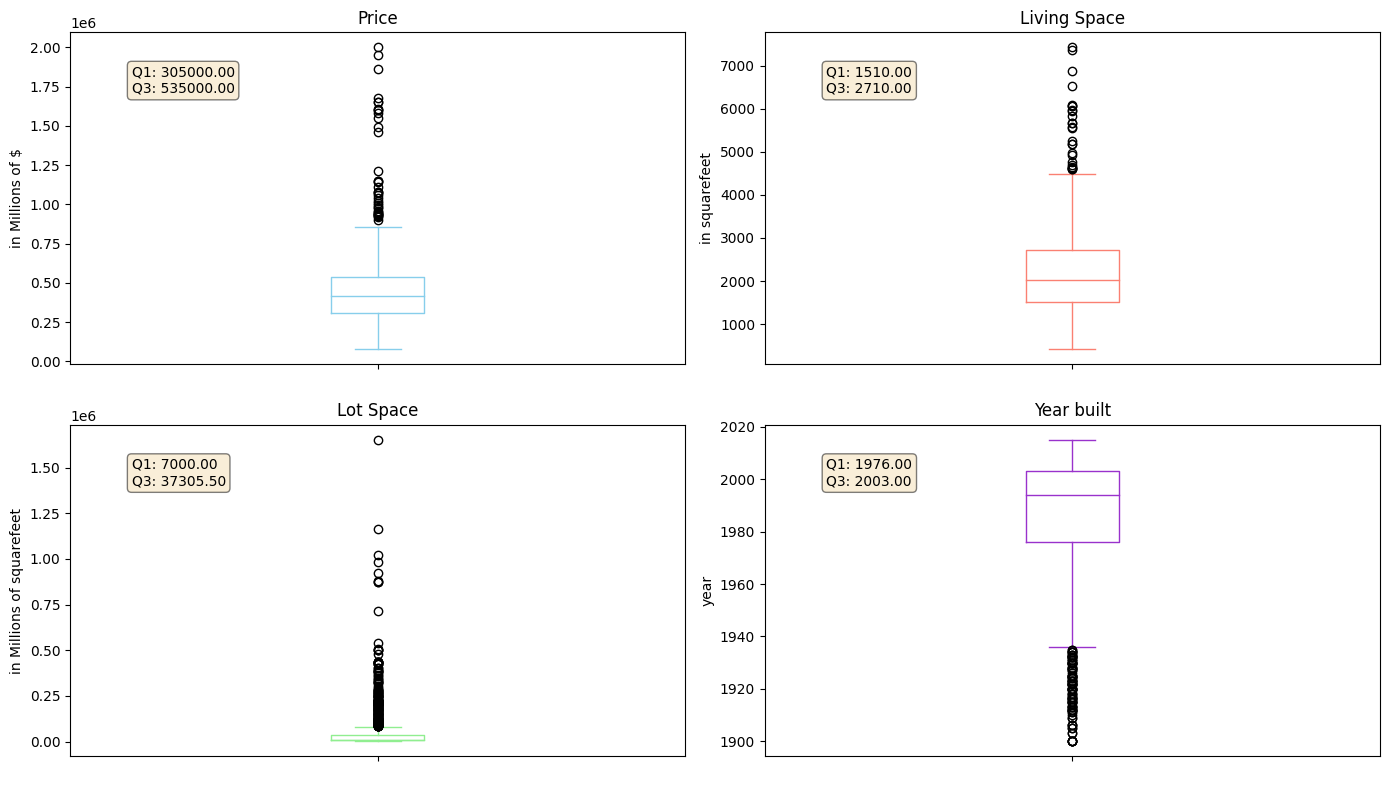

<Figure size 800x500 with 0 Axes>

In [165]:
# Select four specific columns
selected_columns = ['price', 'sqft_living', 'sqft_lot', 'yr_built']

# Create subplots with four individual box plots next to each other
fig, axs = plt.subplots(2, 2, figsize=(14, 8))  # Adjust figure size if needed
axs = axs.flatten()


colors = ['skyblue', 'salmon', 'lightgreen', 'darkorchid']
labels = [' ', ' ', ' ', ' ']
ylabels = ['in Millions of $', 'in squarefeet', 'in Millions of squarefeet', 'year']
titles = ['Price', 'Living Space', 'Lot Space', 'Year built']

# Customize each subplot individually
for i, (col, color, label) in enumerate(zip(selected_columns, colors, labels)):
    # Create box plot
    data_o[col].plot(kind='box', ax=axs[i], color=color, label=label)
    
    # Set title
    axs[i].set_title(titles[i], fontsize=12)  # Individual title
    
    # Set y-axis label
    axs[i].set_ylabel(ylabels[i], fontsize=10)  # Y-axis label
 
    # Add text box with quartile 1 and quartile 3 values
    q1 = data_o[col].quantile(0.25)
    q3 = data_o[col].quantile(0.75)
    axs[i].text(0.1, 0.9, f'Q1: {q1:.2f}\nQ3: {q3:.2f}', transform=axs[i].transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))  # Text box

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()   
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(3, 6))  # Adjust the width and height here
boxplot = ax.boxplot(data_o[['price']].values, patch_artist=True, widths=0.5)

# Define colors for each box
colors = ['darkorchid']

# Apply colors to each box
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate Q1 and Q3
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# Add a textbox with Q1 and Q3 information
textstr = f'Q1: {Q1:.2f}\nQ3: {Q3:.2f}'

# Add a textbox in the upper right corner
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)


# Add a label to the y-axis
ax.set_ylabel('Price in $ Million')

# Set the x-tick labels
ax.set_xticklabels(['Outskirts'])

# Show the plot
plt.show()

In [160]:
upper_10['date_num'] = (upper_10['date'] - upper_10['date'].min()).dt.days

# Function to perform correlation analysis
def perform_correlation(group):
    return group['price'].corr(group['date_num'])

# Group by zipcode and apply correlation function
correlations = upper_10.groupby('waterfront').apply(perform_correlation).sort_values()

# Print results
print(correlations)

waterfront
0.000   -0.008
1.000    0.178
dtype: float64


In [153]:
data_dup[data_dup['id'].isin(upper_10['id']) == True]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc,month,season,time
137,10957,3271300955,2014-07-03,554729.000,4,2.500,2020,4350,2.000,0.000,...,0.000,98199,47.650,-122.410,1620,5800,center,7,summer,1
138,10958,3271300955,2015-02-24,868000.000,4,2.500,2020,4350,2.000,0.000,...,0.000,98199,47.650,-122.410,1620,5800,center,2,winter,2
219,13721,5332200530,2014-06-13,910000.000,5,2.500,2350,4000,2.000,0.000,...,0.000,98112,47.627,-122.296,1840,4000,center,6,summer,1
220,13722,5332200530,2015-04-24,1020000.000,5,2.500,2350,4000,2.000,0.000,...,NaN,98112,47.627,-122.296,1840,4000,center,4,spring,2
227,19320,6021500970,2014-05-28,345000.000,2,1.000,1080,4000,1.000,0.000,...,0.000,98117,47.690,-122.387,1530,4240,center,5,spring,1
228,19321,6021500970,2015-04-07,874950.000,2,1.000,1080,4000,1.000,0.000,...,NaN,98117,47.690,-122.387,1530,4240,center,4,spring,2
263,3295,7409700215,2014-06-06,550000.000,3,1.500,1900,5000,1.500,0.000,...,0.000,98115,47.678,-122.294,2090,5000,center,6,summer,1
264,3296,7409700215,2015-03-13,921500.000,3,1.500,1900,5000,1.500,0.000,...,0.000,98115,47.678,-122.294,2090,5000,center,3,spring,2


In [154]:
upper_10

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,loc,month,season,date_num
26,1794500383,2014-06-26,937000.000,3,1.750,2450,2691,2.000,0.000,0.000,...,NaN,98119,47.639,-122.360,1760,3573,center,6,summer,55
54,4217401195,2015-03-03,920000.000,5,2.250,2730,6000,1.500,0.000,0.000,...,0.000,98105,47.657,-122.281,2730,6000,center,3,spring,305
55,9822700295,2014-05-12,885000.000,4,2.500,2830,5000,2.000,NaN,0.000,...,0.000,98105,47.660,-122.290,1950,5000,center,5,spring,10
85,4232902595,2014-11-14,940000.000,3,1.500,2140,3600,2.000,0.000,0.000,...,0.000,98119,47.634,-122.365,2020,4800,center,11,autumn,196
91,5036300431,2015-03-11,1100000.000,5,2.750,3520,6353,2.000,0.000,0.000,...,0.000,98199,47.651,-122.391,2520,6250,center,3,spring,313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21410,1070000180,2014-10-15,1110000.000,4,3.500,3660,4760,2.000,NaN,0.000,...,0.000,98199,47.648,-122.409,3210,4640,center,10,autumn,166
21416,7104100110,2015-05-11,899000.000,4,3.500,2490,5500,2.000,0.000,0.000,...,0.000,98136,47.550,-122.393,1710,5500,center,5,spring,374
21461,7010700308,2014-11-12,1010000.000,4,3.250,3610,4000,2.000,0.000,0.000,...,NaN,98199,47.658,-122.396,1980,4000,center,11,autumn,194
21489,9468200109,2014-06-17,1560000.000,3,3.500,4360,6240,2.000,0.000,3.000,...,0.000,98103,47.679,-122.354,1920,3910,center,6,summer,46


In [177]:
# Pivot the DataFrame to have separate columns for time 1 and time 2 prices and seasons
pivot_df = data_dup[data_dup['loc'] == 'center'].pivot(index='id', columns='time')

# Flatten the MultiIndex columns
pivot_df.columns = [f"{col[0]}_{col[1]}" for col in pivot_df.columns]

# Calculate the price difference between time 1 and time 2
pivot_df['price_difference'] = pivot_df['price_2'] / pivot_df['price_1']

# Extract the season values at time 1 and time 2
pivot_df['bedrooms'] = data_dup[data_dup['time'] == 1].set_index('id')['bedrooms']

# Display the result
selected_columns = ['price_difference', 'bedrooms']
df2 = pd.DataFrame(pivot_df[selected_columns])
df2

,price_difference,bedrooms
id,,
123039336,1.655,1
324000530,2.278,3
641900050,1.492,4
723049156,1.911,3
726049190,1.499,3
...,...,...
9222400605,1.009,5
9250900104,1.653,5
9828200460,1.654,2


In [196]:
# Pivot the DataFrame to have separate columns for time 1 and time 2 prices and seasons
pivot_df = data_dup[data_dup['loc'] == 'center'].pivot(index='id', columns='time')

# Flatten the MultiIndex columns
pivot_df.columns = [f"{col[0]}_{col[1]}" for col in pivot_df.columns]

# Calculate the price difference between time 1 and time 2
pivot_df['price_difference'] = pivot_df['price_2'] / pivot_df['price_1']

# Extract the season values at time 1 and time 2
pivot_df['yr_built'] = data_dup[data_dup['time'] == 1].set_index('id')['yr_built']

# Display the result
selected_columns = ['price_difference', 'yr_built']
df2 = pd.DataFrame(pivot_df[selected_columns])

# Function to perform correlation analysis
df2

correlation, p_value = pearsonr(df2['price_difference'], df2['yr_built'])

print(correlation)
print(p_value)

-0.22699998988706405
0.034483124574527554


In [ ]:
# Pivot the DataFrame to have separate columns for time 1 and time 2 prices and seasons
pivot_df = data_dup[data_dup['loc'] == 'center'].pivot(index='id', columns='time')

# Flatten the MultiIndex columns
pivot_df.columns = [f"{col[0]}_{col[1]}" for col in pivot_df.columns]

# Calculate the price difference between time 1 and time 2
pivot_df['price_difference'] = pivot_df['price_2'] / pivot_df['price_1']

# Extract the season values at time 1 and time 2
pivot_df['sqft_living'] = data_dup[data_dup['time'] == 1].set_index('id')['sqft_living']

# Display the result
selected_columns = ['price_difference', 'sqft_living']
df2 = pd.DataFrame(pivot_df[selected_columns])

# Function to perform correlation analysis
df2

correlation, p_value = pearsonr(df2['price_difference'], df2['sqft_living'])

print(correlation)
print(p_value)

In [181]:
result = df2.groupby('bedrooms').agg({'price_difference': 'mean', 'bedrooms':'count'})
result

,price_difference,bedrooms
bedrooms,,
1,1.890,4
2,1.827,16
3,1.700,42
4,1.535,11
5,1.637,9
6,1.986,5


In [170]:
upper_10.groupby('waterfront').agg({'price': 'mean'})

,price
waterfront,
0.000,1273838.459
1.000,1719129.348


In [195]:
upper_10.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,date_num
count,902.000,902,902.000,902.000,902.000,902.000,902.000,902.000,806.000,898.000,...,902.000,902.000,744.000,902.000,902.000,902.000,902.000,902.000,902.000,902.000
mean,4417460559.910,2014-10-28 15:25:56.541020160,1284900.365,3.880,2.804,3118.033,8410.518,1.843,0.057,1.195,...,2414.619,1952.685,330.860,98129.375,47.638,-122.334,2440.453,7484.910,6.593,179.643
min,148000375.000,2014-05-02 00:00:00,865000.000,2.000,1.000,1080.000,609.000,1.000,0.000,0.000,...,1000.000,1900.000,0.000,98102.000,47.353,-122.416,980.000,977.000,1.000,0.000
25%,1563102497.500,2014-07-15 00:00:00,950000.000,3.000,2.250,2490.000,4500.000,1.500,0.000,0.000,...,1870.000,1923.000,0.000,98112.000,47.626,-122.378,1910.000,4500.000,4.000,74.000
50%,4030100147.500,2014-10-14 12:00:00,1115000.000,4.000,2.750,2970.000,5800.000,2.000,0.000,0.000,...,2245.000,1946.000,0.000,98116.000,47.640,-122.327,2380.000,5500.000,6.000,165.500
75%,7011075463.250,2015-02-24 00:00:00,1400000.000,4.000,3.250,3530.000,8222.250,2.000,0.000,2.000,...,2788.000,1989.000,0.000,98144.000,47.671,-122.288,2897.500,7612.000,9.000,298.000
max,9839301165.000,2015-05-27 00:00:00,7700000.000,9.000,8.000,12050.000,91681.000,3.500,1.000,4.000,...,8570.000,2015.000,2015.000,98199.000,47.776,-122.225,4950.000,128066.000,12.000,390.000
std,2917171035.759,NaN,527060.817,0.968,0.795,972.082,8708.040,0.506,0.232,1.514,...,828.468,36.465,743.939,30.547,0.057,0.048,686.644,8259.937,3.009,116.010


In [198]:
data_dup['loc'].value_counts()

loc
center       175
suburbs      162
outskirts     16
Name: count, dtype: int64

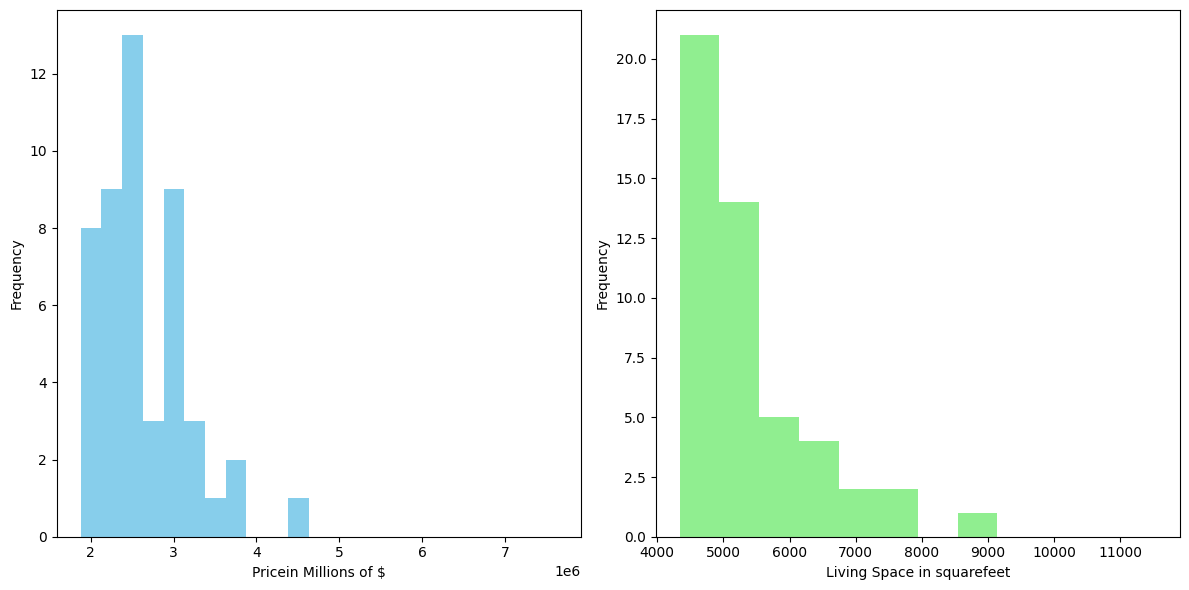

In [211]:
#threshold1 = upper_10['price'].quantile(0.9)
#threshold2 = upper_10['sqft_living'].quantile(0.9)

#upper_10 = upper_10[upper_10['price'] >= threshold1]
#upper_10 = upper_10[upper_10['sqft_living'] >= threshold2]

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot histogram for 'bedrooms'
ax1.hist(upper_10['price'], bins=np.arange(min(upper_10['price']), max(upper_10['price']) + 0.5, 250000), color='skyblue')
ax1.set_xlabel('Pricein Millions of $')
ax1.set_ylabel('Frequency')

# Plot histogram for 'bathrooms'
ax2.hist(upper_10['sqft_living'], bins=np.arange(min(upper_10['sqft_living']), max(upper_10['sqft_living']) + 0.5, 600), color='lightgreen')
ax2.set_xlabel('Living Space in squarefeet')
ax2.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()